## 3.2.1 重新索引

### 前面说过，索引对象是无法进行修改的，本节所说的重新索引并不是给索引重新命名，而是对索引重新排序，如果某个索引值不存在的话，就会引入缺失值。首先来看下Series重新排序后的索引

In [15]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
obj = Series([1,2,3,-4],index=['b','a','c','d'])
obj

b    1
a    2
c    3
d   -4
dtype: int64

In [4]:
obj2 = obj.reindex(['a','b','c','d','e'])
obj2

a    2.0
b    1.0
c    3.0
d   -4.0
e    NaN
dtype: float64

### 如果需要对插入的缺失值进行填充的话，可通过method参数来实现，参数值为ffill或pad时为向前填充，参数值为bfill或backfill时为向后填充

In [5]:
obj = Series([1,-2,3,-4],index=[0,2,3,5])
obj

0    1
2   -2
3    3
5   -4
dtype: int64

In [6]:
obj2 = obj.reindex(range(6),method='ffill')
obj2

0    1
1    1
2   -2
3    3
4    3
5   -4
dtype: int64

### 对于DataFrame数据来说，行和列索引都是可以重新索引的

In [8]:
df = DataFrame(np.arange(9).reshape(3,3),index=['a','c','d'],columns=['name','id','sex'])
df

,name,id,sex
a,0,1,2
c,3,4,5
d,6,7,8


In [9]:
df2 =df.reindex(['a','b','c','d'])
df2

,name,id,sex
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [10]:
df3 = df.reindex(columns=['name','year','id'],fill_value=0)
df3

,name,year,id
a,0,0,1
c,3,0,4
d,6,0,7


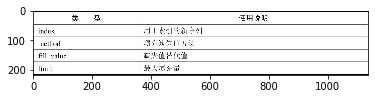

In [18]:
img = plt.imread('./reindex.jpg')
plt.imshow(img)

## 3.2.2 更换索引

### 在DataFrame数据中，如果不希望使用默认行索引的话，可在创建的时候通过index参数来设置行索引。有时我们希望将列数据作为行索引，这时可通过set_index方法来实现

In [19]:
data = {
    'name':['张三','李四','王五','小明'],
    'sex':['female','female','male','male'],
    'year':[2001,2001,2003,2002],
    'city':['北京','上海','广州','北京']
}
df = DataFrame(data)
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京


In [20]:
df2 = df.set_index('name')
df2

,sex,year,city
name,,,
张三,female,2001,北京
李四,female,2001,上海
王五,male,2003,广州
小明,male,2002,北京


### 与set_index方法相反的方法是reset_index方法

In [37]:
df5 = df2.reset_index()
df5

,index,name,grade
0,2,王五,65
1,0,张三,68
2,1,李四,78
3,3,小明,97


### 下面给读者举一个实际的例子。对于Excel表格而言，排序之后，行索引并不会发生改变（依旧是从1开始计数），而对DataFrame数据，排序之后其行索引会改变

In [22]:
data = {
    'name':['张三','李四','王五','小明'],
    'grade':[68,78,65,97]
}
df = DataFrame(data)
df

,name,grade
0,张三,68
1,李四,78
2,王五,65
3,小明,97


In [23]:
df2 = df.sort_values(by='grade')
df2

,name,grade
2,王五,65
0,张三,68
1,李四,78
3,小明,97


### 这里要获取成绩倒数两位同学的数据的话，需要记住其单独的索引。但当数据量大的时候，想查看多位排序过后的数据时，这种做法是很不方便的。我们可通过恢复索引，对数据进行排序，这样操作起来会方便很多

In [24]:
df3 = df2.reset_index()
df3

,index,name,grade
0,2,王五,65
1,0,张三,68
2,1,李四,78
3,3,小明,97


### 原索引可通过drop参数进行删除

In [26]:
df4 = df2.reset_index(drop=True)
df4

,name,grade
0,王五,65
1,张三,68
2,李四,78
3,小明,97


## 3.2.3 索引和选取

### 在数据分析中，选取需要的数据进行处理和分析是很重要的。在Excel表格中，通过鼠标点选或扩选可以轻松地选取数据，而在pandas数据中，需要通过索引来完成数据的选取工作。

### Series数据的选取较为简单，使用方法类似于Python的列表，这里不仅可以通过0到N-1（N是数据长度）来进行索引，同时也可以通过设置好的索引标签来进行索引

In [27]:
obj = Series([1,-2,3,-4],index=['a','b','c','d'])
obj

a    1
b   -2
c    3
d   -4
dtype: int64

In [28]:
obj[2]

3

In [29]:
obj['b']

-2

In [32]:
obj[['a','c']]

a    1
c    3
dtype: int64

### 切片运算与Python列表略有不同，如果是利用索引标签切片，其尾端是被包含的

In [33]:
obj[0:2]

a    1
b   -2
dtype: int64

In [34]:
obj['a':'c']

a    1
b   -2
c    3
dtype: int64

### DataFrame数据的选取更复杂些，因为它是二维数组，选取列和行都有具体的使用方法

### 通过列索引标签或以属性的方式可以单独获取DataFrame的列数据，返回的数据为Series结构

In [38]:
data = {
    'name':['张三','李四','王五','小明'],
    'sex':['female','female','male','male'],
    'year':[2001,2001,2003,2002],
    'city':['北京','上海','广州','北京']
}
df = DataFrame(data)
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京


In [39]:
df['city']

0    北京
1    上海
2    广州
3    北京
Name: city, dtype: object

In [41]:
df.name

0    张三
1    李四
2    王五
3    小明
Name: name, dtype: object

### 通过两个中括号，可以获取多个列的数据

In [42]:
df[['city','sex']]

,city,sex
0,北京,female
1,上海,female
2,广州,male
3,北京,male


#### 注意：选取列不能使用切片，因为切片用于选取行数据。

### 通过行索引标签或行索引位置（0到N-1）的切片形式可选取DataFrame的行数据

In [43]:
df2 = df.set_index('name')
df2

,sex,year,city
name,,,
张三,female,2001,北京
李四,female,2001,上海
王五,male,2003,广州
小明,male,2002,北京


In [50]:
df[0:2]

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海


In [46]:
df2['李四':'王五']

,sex,year,city
name,,,
李四,female,2001,上海
王五,male,2003,广州


### 显然，切片方法选取行有很大的局限性。如果想获取单独的几行，通过loc和iloc方法可以实现。loc方法是按行索引标签选取数据；iloc方法是按行索引位置选取数据

In [47]:
df2.loc['张三']

sex     female
year      2001
city        北京
Name: 张三, dtype: object

In [51]:
df2.loc[['张三','王五']]

,sex,year,city
name,,,
张三,female,2001,北京
王五,male,2003,广州


In [52]:
df2.iloc[1]

sex     female
year      2001
city        上海
Name: 李四, dtype: object

In [53]:
df2.iloc[[1,3]]

,sex,year,city
name,,,
李四,female,2001,上海
小明,male,2002,北京


### 在数据分析中，有时可能只是对部分行和列进行操作，这时就需要选取DataFrame数据中行和列的子集，而通过ix方法就可以轻松地完成。ix方法同时支持索引标签和索引位置来进行数据的选取

In [54]:
df2.ix[['张三','王五'],0:2]

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,sex,year
name,,
张三,female,2001
王五,male,2003


### 其实，ix方法除了可以选取部分行和列外，也可以选取单独的行或者列

In [55]:
df2.ix[:,['sex','year']]

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,sex,year
name,,
张三,female,2001
李四,female,2001
王五,male,2003
小明,male,2002


In [56]:
df2.ix[[1,3],:]

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,sex,year,city
name,,,
李四,female,2001,上海
小明,male,2002,北京


### 以df 2为例，筛选出性别为female的数据，这时就需要通过布尔选择来完成

In [57]:
df2['sex'] == 'female'

name
张三     True
李四     True
王五    False
小明    False
Name: sex, dtype: bool

In [58]:
df2[df2['sex'] == 'female']

,sex,year,city
name,,,
张三,female,2001,北京
李四,female,2001,上海


### 与数组布尔型索引类似，既然可以使用布尔选择，那么同样也适用于不等于符号（! =）、负号（-）、和（&）、或（|）

In [59]:
df2[(df2['sex']=='female')&(df2['city'] == '北京')]

,sex,year,city
name,,,
张三,female,2001,北京


## 3.2.4 操作行和列

### 以df数据为例，该班级转来了一个新生，需要在原有数据的基础上增加一行数据。可以通过append函数传入字典结构数据即可

In [62]:
new_data = {
    'city':'武汉',
    'name':'小李',
    'sex':'male',
    'year':2002
}

In [63]:
df = df.append(new_data,ignore_index=True) #忽略索引值
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京
4,小李,male,2002,武汉


### 这些学生都是2018级的，这里我们新建一列用于存放该信息。为一个不存在的列赋值，即可创建一个新列

In [64]:
df['class'] = 2018
df

,name,sex,year,city,class
0,张三,female,2001,北京,2018
1,李四,female,2001,上海,2018
2,王五,male,2003,广州,2018
3,小明,male,2002,北京,2018
4,小李,male,2002,武汉,2018


### 如果要新增的列中的数值不一样时，可以传入列表或数组结构数据进行赋值

In [65]:
df['math'] = [92,78,58,69,87]
df

,name,sex,year,city,class,math
0,张三,female,2001,北京,2018,92
1,李四,female,2001,上海,2018,78
2,王五,male,2003,广州,2018,58
3,小明,male,2002,北京,2018,69
4,小李,male,2002,武汉,2018,87


### 如果王五同学转学了，class字段没有用了，就需要删除其信息。通过drop方法可以删除指定轴上的信息

In [66]:
new_df = df.drop(2)  #删除行
new_df

,name,sex,year,city,class,math
0,张三,female,2001,北京,2018,92
1,李四,female,2001,上海,2018,78
3,小明,male,2002,北京,2018,69
4,小李,male,2002,武汉,2018,87


In [67]:
new_df = new_df.drop('class',axis=1)  #删除列
new_df

,name,sex,year,city,math
0,张三,female,2001,北京,92
1,李四,female,2001,上海,78
3,小明,male,2002,北京,69
4,小李,male,2002,武汉,87


### 这里的“改”指的是行和列索引标签的修改，通过rename函数，可完成由于某些原因导致的标签录入错误的问题

In [69]:
new_df.rename(index={3:2,4:3},columns={'math':'Math'},inplace=True)   #inplace可以再原数据上修改
new_df

,name,sex,year,city,Math
0,张三,female,2001,北京,92
1,李四,female,2001,上海,78
2,小明,male,2002,北京,69
3,小李,male,2002,武汉,87
